# Library

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
import numpy as np
import os, sys
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.preprocessing import image
from keras.utils import np_utils
from keras.models import Sequential, Model, load_model, model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau, CSVLogger, EarlyStopping,LearningRateScheduler, ModelCheckpoint
import math
from keras.layers.merge import concatenate
from keras.regularizers import l2
#from scipy.misc import imread, imresize

Using TensorFlow backend.


In [3]:
cd /content/drive/My Drive/Colab Notebooks/GoogleNet/First GoogleNet

/content/drive/My Drive/Colab Notebooks/GoogleNet/First GoogleNet


# Load data

In [0]:
X = np.load('../X.npy')
Y = np.load('../Y.npy')

In [0]:
X_Train = np.load('../X_Train.npy')
X_Test = np.load('../X_Test.npy')
Y_Train = np.load('../Y_Train.npy')
Y_Test = np.load('../Y_Test.npy')

# Model

In [5]:
model = load_model('GoogleNet.hdf5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.





# Evaluate score

In [0]:
score = model.evaluate(X, Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

9850/9850 [==============================] - 584s 59ms/step
Test loss: 13.73926666472769
Test accuracy: 0.9720812439918518


In [0]:
score = model.evaluate(X_Test, Y_Test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1970/1970 [==============================] - 121s 61ms/step
Test loss: 13.823772646327914
Test accuracy: 0.9441624283790588


In [7]:
rs = np.zeros((6,6), dtype=int)
noClass = np.zeros(6, dtype=int)

for i in range (0, 9850):
  predict = model.predict(np.reshape(X[i], (1,224,224,3)))[0].tolist()
  predict = predict.index(max(predict))
  realClass = np.where(Y[i] == 1)[0][0]

  rs[realClass][predict] = rs[realClass][predict] + 1
  noClass[realClass] = noClass[realClass] + 1

print(rs)
print(noClass)

[[ 548    3    1    0    2    1]
 [   1  836    1   11    9    2]
 [   1   64  357    4    0   41]
 [   0   45    1 1293   33    0]
 [   0    9    0    7 5760    0]
 [   4   14   21    0    0  781]]
[ 555  860  467 1372 5776  820]


In [8]:
eachAccuracy = np.zeros((6,6), dtype=float)

for i in range(6):
  for j in range(6):
    eachAccuracy[i][j] = round(rs[i][j]/noClass[i],2)

print(eachAccuracy)

[[0.99 0.01 0.   0.   0.   0.  ]
 [0.   0.97 0.   0.01 0.01 0.  ]
 [0.   0.14 0.76 0.01 0.   0.09]
 [0.   0.03 0.   0.94 0.02 0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.   0.02 0.03 0.   0.   0.95]]


# Diagram

In [0]:
df = pd.read_csv('GoogleNet.csv')
df

,Unnamed: 0,epoch,acc,loss,lr,val_acc,val_loss
0,0,0,0.847589,74.533702,0.0001,0.802030,74.441470
1,1,1,0.836294,74.196132,0.0001,0.835533,74.018245
2,2,2,0.854442,73.801856,0.0001,0.842640,73.630548
3,3,3,0.855076,73.449633,0.0001,0.797970,73.443464
4,4,4,0.859010,73.097446,0.0001,0.848731,72.930327
...,...,...,...,...,...,...,...
435,435,435,0.974239,13.708755,0.0001,0.941624,13.779670
436,436,436,0.974365,13.669769,0.0001,0.938579,13.755038
437,437,437,0.979569,13.618959,0.0001,0.939086,13.697407
438,438,438,0.975888,13.582232,0.0001,0.924873,13.700819


In [0]:
import seaborn as sns
from IPython.display import display
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


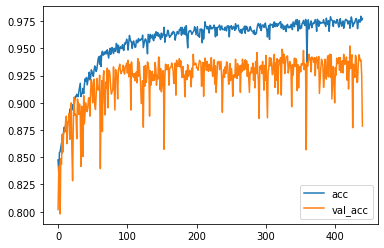

In [0]:
display(df[['acc', 'val_acc']].plot())